# **Neural Network Classification With TensorFlow**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles
n_samples=1000
circles= make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
import tensorflow as tf


In [ ]:
X= circles[0]
y=circles[1]
y.shape, X.shape

((1000,), (1000, 2))

In [ ]:
X[:,0].shape

(1000,)

In [ ]:
# Lets make a dataframe from X and y.
circles=pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


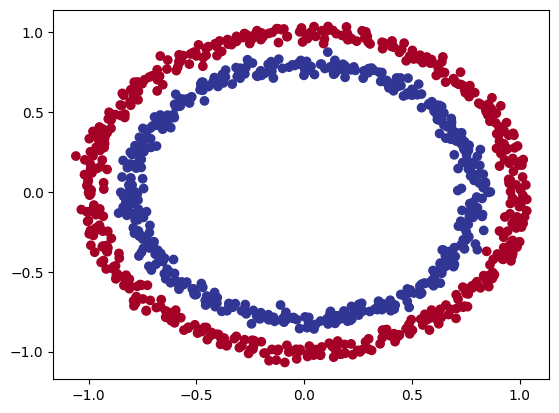

In [ ]:
plt.scatter(circles["X0"], circles["X1"], c= circles.label, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
X[0].shape, y[0].shape

((2,), ())

## Steps in Modelling:

In [ ]:
# Lets create a sample model for classification

model_0= tf.keras.Sequential(
    [tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1, activation="sigmoid")]
)

model_0.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

model_0.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 5s 3ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6010
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.7330
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.7330
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.9150
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.9380
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.9790
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.9940
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 1.0000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9980
Epoch 11/

In [ ]:
model_0.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000


[0.0030861985869705677, 1.0]

In [ ]:
# Create a grid of points that cover the entire feature space
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Predict the class of each point in the grid using the neural network
  Z = model_0(np.c_[xx.ravel(), yy.ravel()])
  Z = np.reshape(Z,xx.shape)

  # Plot the decision boundary using matplotlib
  plt.contourf(xx, yy,Z, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=30)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

🔑 **Note:** If our model is unable to put a curve between the red and blues then we should introduce it to the concept of non linearity but since in our case, the model is performing better so we will leave it as it is.

In [ ]:
#Lets evaluate our model on test dataset.
tf.random.set_seed(42)

X_train, y_train= X[:800], y[:800]
X_test, y_test=X[800:], y[800:]

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [ ]:
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history=model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6869 - accuracy: 0.5288
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7025
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.7175
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.9125
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.8375
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.9550
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.9375
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.9500
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.9825
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9950
Epoch 11/

In [ ]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000


[0.004890274256467819, 1.0]

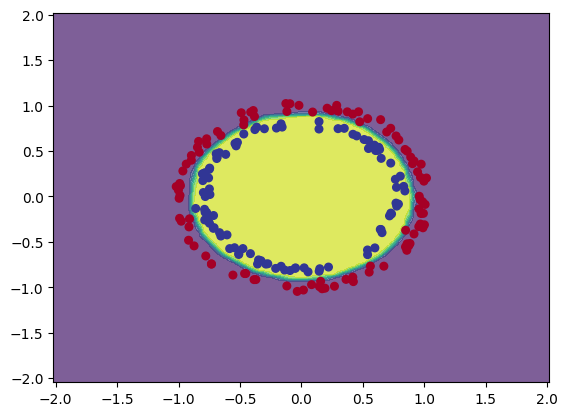

In [ ]:
plot_decision_boundary(model_1, X_test, y_test)

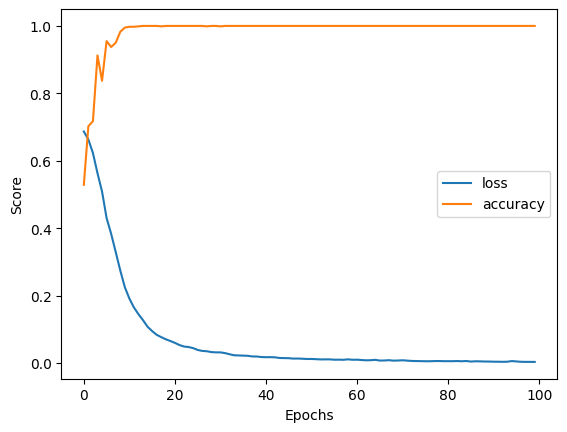

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Score");

In [ ]:
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history=model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_callback])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: >

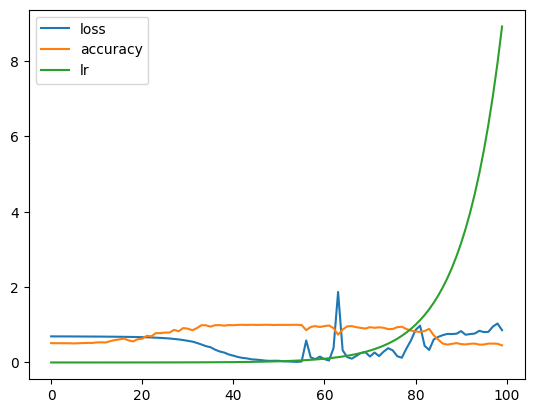

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
lrs = 1e-4*10 **(tf.range(100)/20)

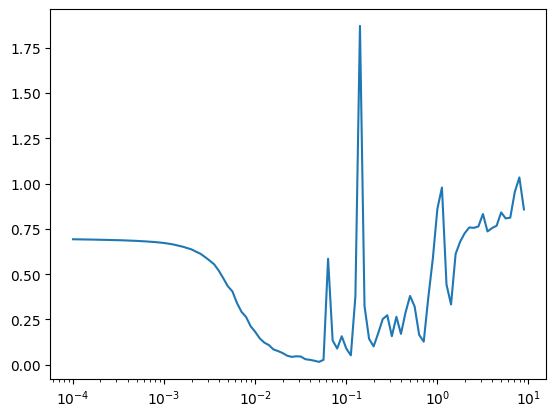

In [ ]:
plt.semilogx(lrs, history.history["loss"])

In [ ]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4950


[0.6932517290115356, 0.4950000047683716]

🥴 Looks like our model_2 is not performing better on the Test dataset. Lets plot the decision boundaries for both test and train datasets.

<ipython-input-25-394868424aa8>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


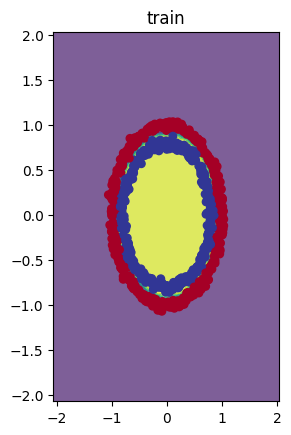

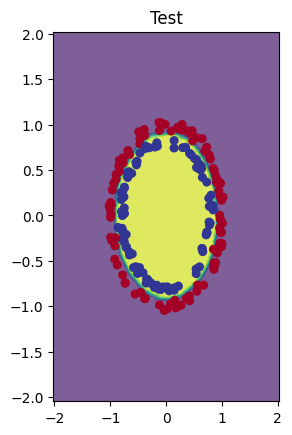

In [ ]:
plt.plot(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)
plt.show()

There are some more classification matrices. lets try them to evaluate our model.
* precision
* Recall
* F1-score
* Confusion matrix
* classification report

In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score, classification_report, confusion_matrix

In [ ]:
y_preds=model_1.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
precision_score(y_test, tf.round(y_preds))#tf.round() converts predicition probabilities to binary outputs(0 or 1)

1.0

In [ ]:
recall_score(y_test, tf.round(y_preds))

1.0

In [ ]:
f1_score(y_test, tf.round(y_preds))

1.0

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

In [ ]:
import seaborn as sns

In [ ]:
def plot_confusion_matrix(y_true, y_preds, model=None):
  """
  Plots cofusion matrix
  """
  cm=confusion_matrix(y_test, tf.round(y_preds))
  sns.heatmap(cm,
              annot=True,
              cmap='Blues',
              vmin=0,
              vmax=1,
              fmt=".0f")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")


In [ ]:
1e+02

100.0

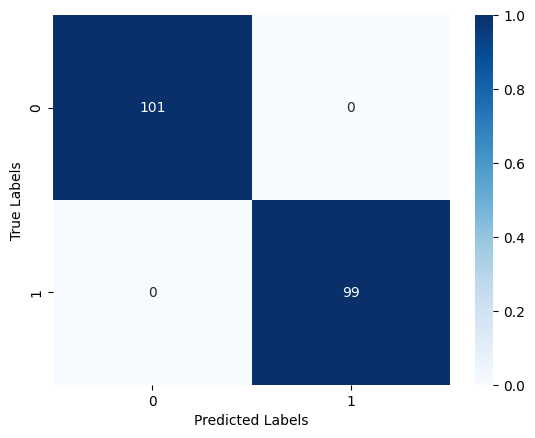

In [ ]:
plot_confusion_matrix(y_test, y_preds)

## Multiclass classification problem with mnist dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train),(X_test, y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
len(X_train), len(y_train)

(60000, 60000)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

9

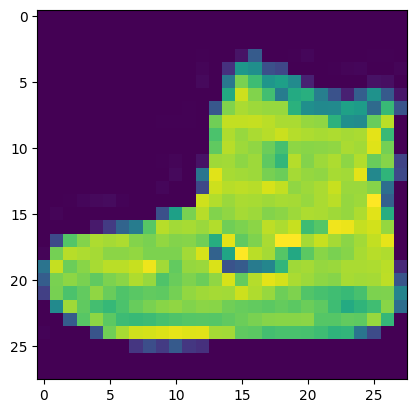

In [ ]:
##Lets plot the training data
plt.imshow(X_train[0])
y_train[0]

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

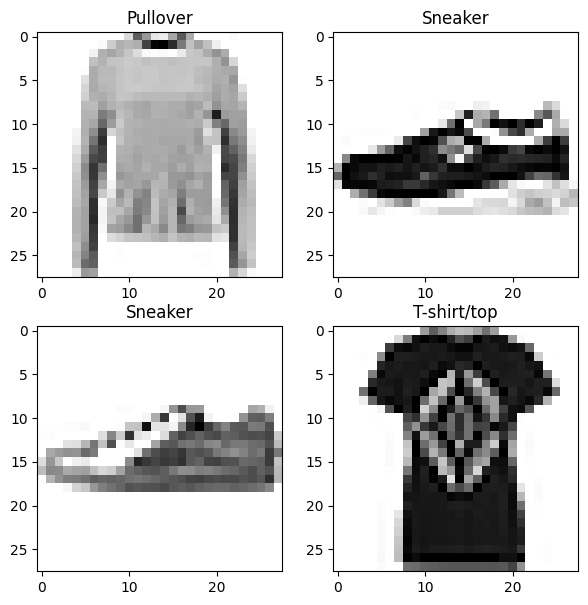

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis=False

🔑**Note:** Things to take care of when modelling for a multiclass classification problem.
* **Input shape:** You have to tell the model the input shape of the data or use ***`tf.keras.layers.Flatten(input_shape=())`*** as the first layer of the model. It will flatten the date into one long vector.
* **Output Shape:** The ouput shape should be one per class of the date. i-e: 10 for this dataset.
* **Loss Function:** The loss Function is different for multiclass classification:
  * ***`CategoricalCrossentropy()`*** when the data is `one_hot` encoded.
  * ***`SparseCategoricalCrossentropy()`*** when the data is in integer form.
* **Output Layer Activation Function:** use `softmax` not `sigmoid`

In [ ]:
tf.random.set_seed(42)
model_3= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history=model_3.fit(X_train,y_train, epochs=25,
            validation_data=(X_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 3.3380 - accuracy: 0.6554 - val_loss: 0.9968 - val_accuracy: 0.6516
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7932 - accuracy: 0.7221 - val_loss: 0.7351 - val_accuracy: 0.7288
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6566 - accuracy: 0.7578 - val_loss: 0.6527 - val_accuracy: 0.7653
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6087 - accuracy: 0.7806 - val_loss: 0.6216 - val_accuracy: 0.7822
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5692 - accuracy: 0.7934 - val_loss: 0.6225 - val_accuracy: 0.7701
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5517 - accuracy: 0.7988 - val_loss: 0.5885 - val_accuracy: 0.7911
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5400 - accuracy: 0.8046 - val_loss: 0.5698 - val_accuracy:

In [ ]:
non_norm_history= norm_history #nothing i just forgot to put 'non' before when naming the model heheh

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


🔑**Note:** Neural networks like the data to be scaled or normalized i-e between (0,1) to produce better results.
So, lets build anothe model and feed it normalized data and then compare the results.

In [ ]:
X_train_norm = X_train/255.0
X_test_norm= X_test/255.0

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history=model_4.fit(X_train_norm,
            y_train,
            epochs=25,
            validation_data=(
                X_test_norm,
                y_test
            ))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5041 - accuracy: 0.8234 - val_loss: 0.4341 - val_accuracy: 0.8446
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.8637 - val_loss: 0.4423 - val_accuracy: 0.8476
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3409 - accuracy: 0.8765 - val_loss: 0.3852 - val_accuracy: 0.8604
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3165 - accuracy: 0.8853 - val_loss: 0.3794 - val_accuracy: 0.8645
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.8894 - val_loss: 0.3722 - val_accuracy: 0.8663
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2842 - accuracy: 0.8943 - val_loss: 0.3609 - val_accuracy: 0.8686
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2744 - accuracy: 0.8985 - val_loss: 0.3580 - val_accuracy:

In [ ]:
y_preds_probs_4= model_4.predict(X_test_norm)
y_preds_4=tf.round(y_preds_probs_4)
y_preds_4[0]

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [ ]:
y_preds_4=y_preds_probs_4.argmax(axis=1)
y_preds_4.shape

(10000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_preds_3=model_3.predict(X_test.reshape(-1,784))

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_preds_3.shape

(10000, 10)

In [ ]:
model_3.evaluate(y_test, y_preds_3)

ValueError: ignored

In [ ]:
model_4.evaluate(y_test, y_preds_4)

In [ ]:
plot_confusion_matrix(y_test, y_preds_4)

Text(0.5, 1.0, 'Non Normalized Data')

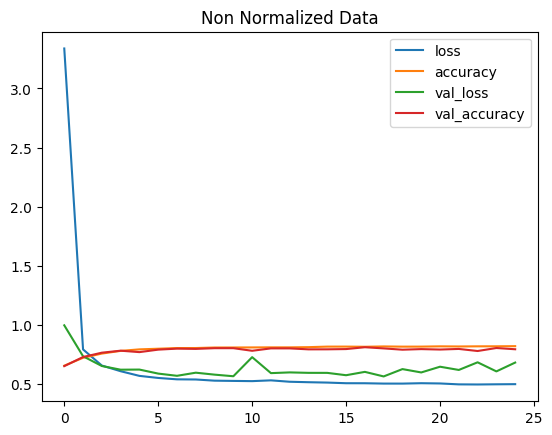

In [ ]:
pd.DataFrame(non_norm_history.history).plot()
plt.title("Non Normalized Data")

Text(0.5, 1.0, 'Normalized Data')

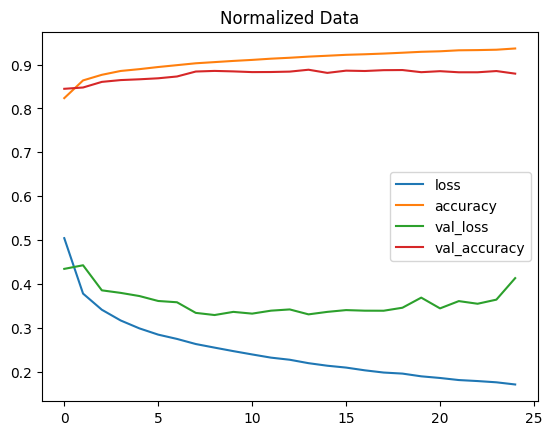

In [ ]:
pd.DataFrame(norm_history.history).plot()
plt.title("Normalized Data")